In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [53]:
import sys
import pandas as pd
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

sys.path.append('../../')

In [3]:
from zarnitsa.DataAugmenterExternally import DataAugmenterExternally

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [4]:
daug = DataAugmenterExternally()

In [5]:
daug.augment_distrib_random(aug_type='uniform', low=5, high=10, size=5)

array([6.37519274, 6.96217948, 7.37293867, 5.12001312, 8.33388316])

In [6]:
daug.augment_distrib_random(aug_type='lognormal', mean=0, sigma=1, size=5)

array([0.78625208, 0.9642116 , 0.43925272, 1.7911702 , 0.49488403])

In [56]:
size = 500

serial_was = pd.Series(daug.augment_distrib_random(aug_type='normal', loc=0, scale=1, size=size))
serial_new = copy(serial_was)
serial_new.loc[serial_new.sample(100).index] = None
serial_new = daug.augment_column(serial_new, aug_type='normal', loc=0, scale=1)

<AxesSubplot:>

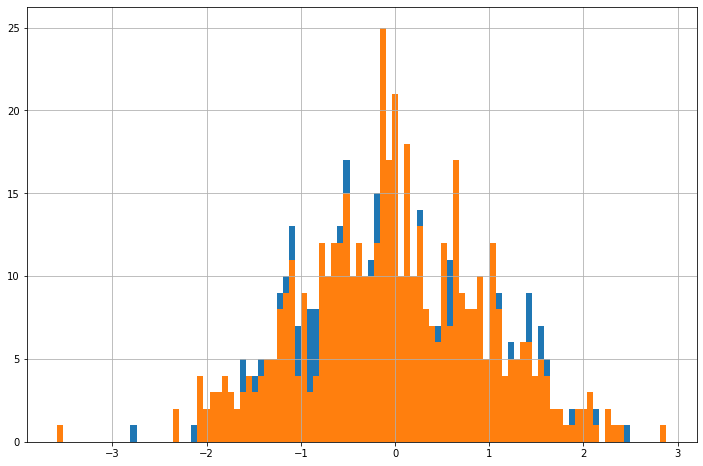

In [59]:
plt.figure(figsize=(12, 8))
serial_was.hist(bins=100)
serial_new.hist(bins=100)

<AxesSubplot:>

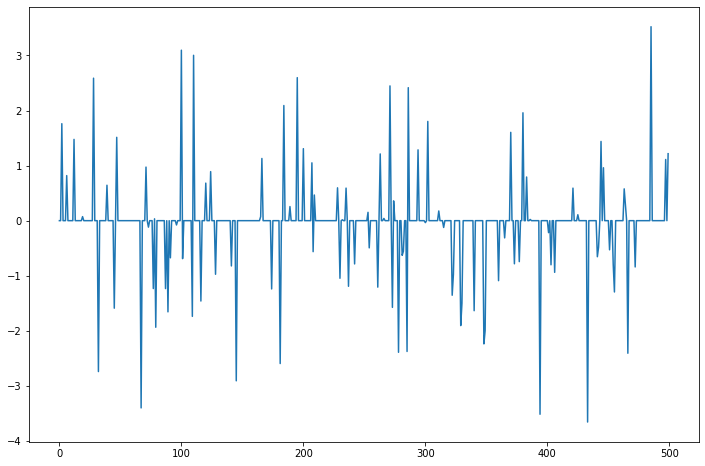

In [60]:
plt.figure(figsize=(12, 8))
(serial_was - serial_new).plot()

In [85]:
size=50
df = pd.DataFrame({
    'data1': daug.augment_distrib_random(aug_type='normal', loc=0, scale=1, size=size),
    'data2': daug.augment_distrib_random(aug_type='normal', loc=0, scale=1, size=size),
})
for col in df.columns:
    df[col].loc[df[col].sample(10).index] = None
df

,data1,data2
0,0.324055,1.076146
1,2.786577,0.928692
2,2.140917,0.368766
3,1.809017,-0.748706
4,NaN,-0.730568
5,1.249577,-1.074045
6,0.006989,-0.639926
7,0.665307,-1.354520
8,-0.136130,NaN
9,2.628737,-0.121764


Single type of augmentation


<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

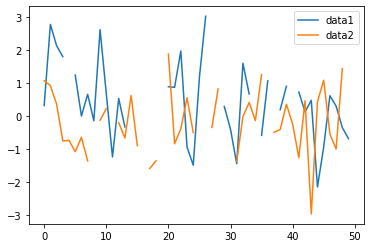

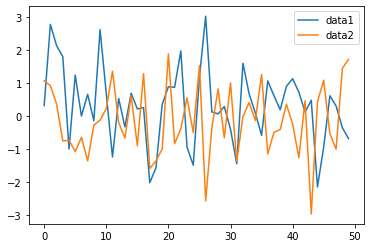

In [86]:
plt.figure(figsize=(12, 8))
df.plot()
daug.augment_dataframe(df, aug_type='normal', loc=0, scale=1).plot()